In [98]:
import pandas as pd 
import re
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [99]:
df = pd.read_csv("/shared/3/projects/benlitterer/localNews/data/interim/articlePairsCosineSim.tsv", sep="\t")

In [100]:
testDf = df

#keep only edges with similarity over the cutoff 
testDf = testDf[testDf["similarity"] >= .85].reset_index(drop=True)
print("Shape of dataframe keeping only 'same' edges")
print(testDf.shape)

def cleanStr(inStr): 
    #we need to keep in mind that the qoutes could be single or double.. 
    return re.sub("(\([\'\"])|([\'\"]\))", "", inStr)

def parseTuple(inStr): 
    #split the tuple on qoutes/comma combination 
    #quotes could be single or double though 
    splitStr = re.split("[\'\"], [\'\"]", inStr)
    return [cleanStr(subStr) for subStr in splitStr] 

print("parsing")
#parse the key column (now a string) into a tuple, which is it's true type 
testDf["key"] = testDf["key"].apply(parseTuple)
testDf["len"] = testDf["key"].apply(lambda x: len(x))

#number of cases parsed incorrectly 
print("number of strings parsed to tuples incorrectly")
print(testDf[testDf["len"] != 2].shape[0])

print("making two columns")
testDf[["key1", "key2"]] = pd.DataFrame(testDf["key"].tolist(), index = testDf.index)

print("creating graph")
graph = nx.from_pandas_edgelist(testDf[["key1", "key2"]], "key1", "key2")


Shape of dataframe keeping only 'same' edges
(3823471, 4)
parsing
number of strings parsed to tuples incorrectly
0
making two columns
creating graph


In [101]:
print("generating components")
components = nx.connected_components(graph)
compList = [comp for comp in components]

generating components


In [102]:
size = [len(comp) for comp in compList]
print(sum([len(item) > 50 for item in compList])/len(compList))
print(sum([len(item) == 1 for item in compList])/len(compList))
print(len(compList))

0.0013072364876997667
0.7830131082779673
139225


Text(0.5, 1.0, 'Distribution of # of articles in clusters ')

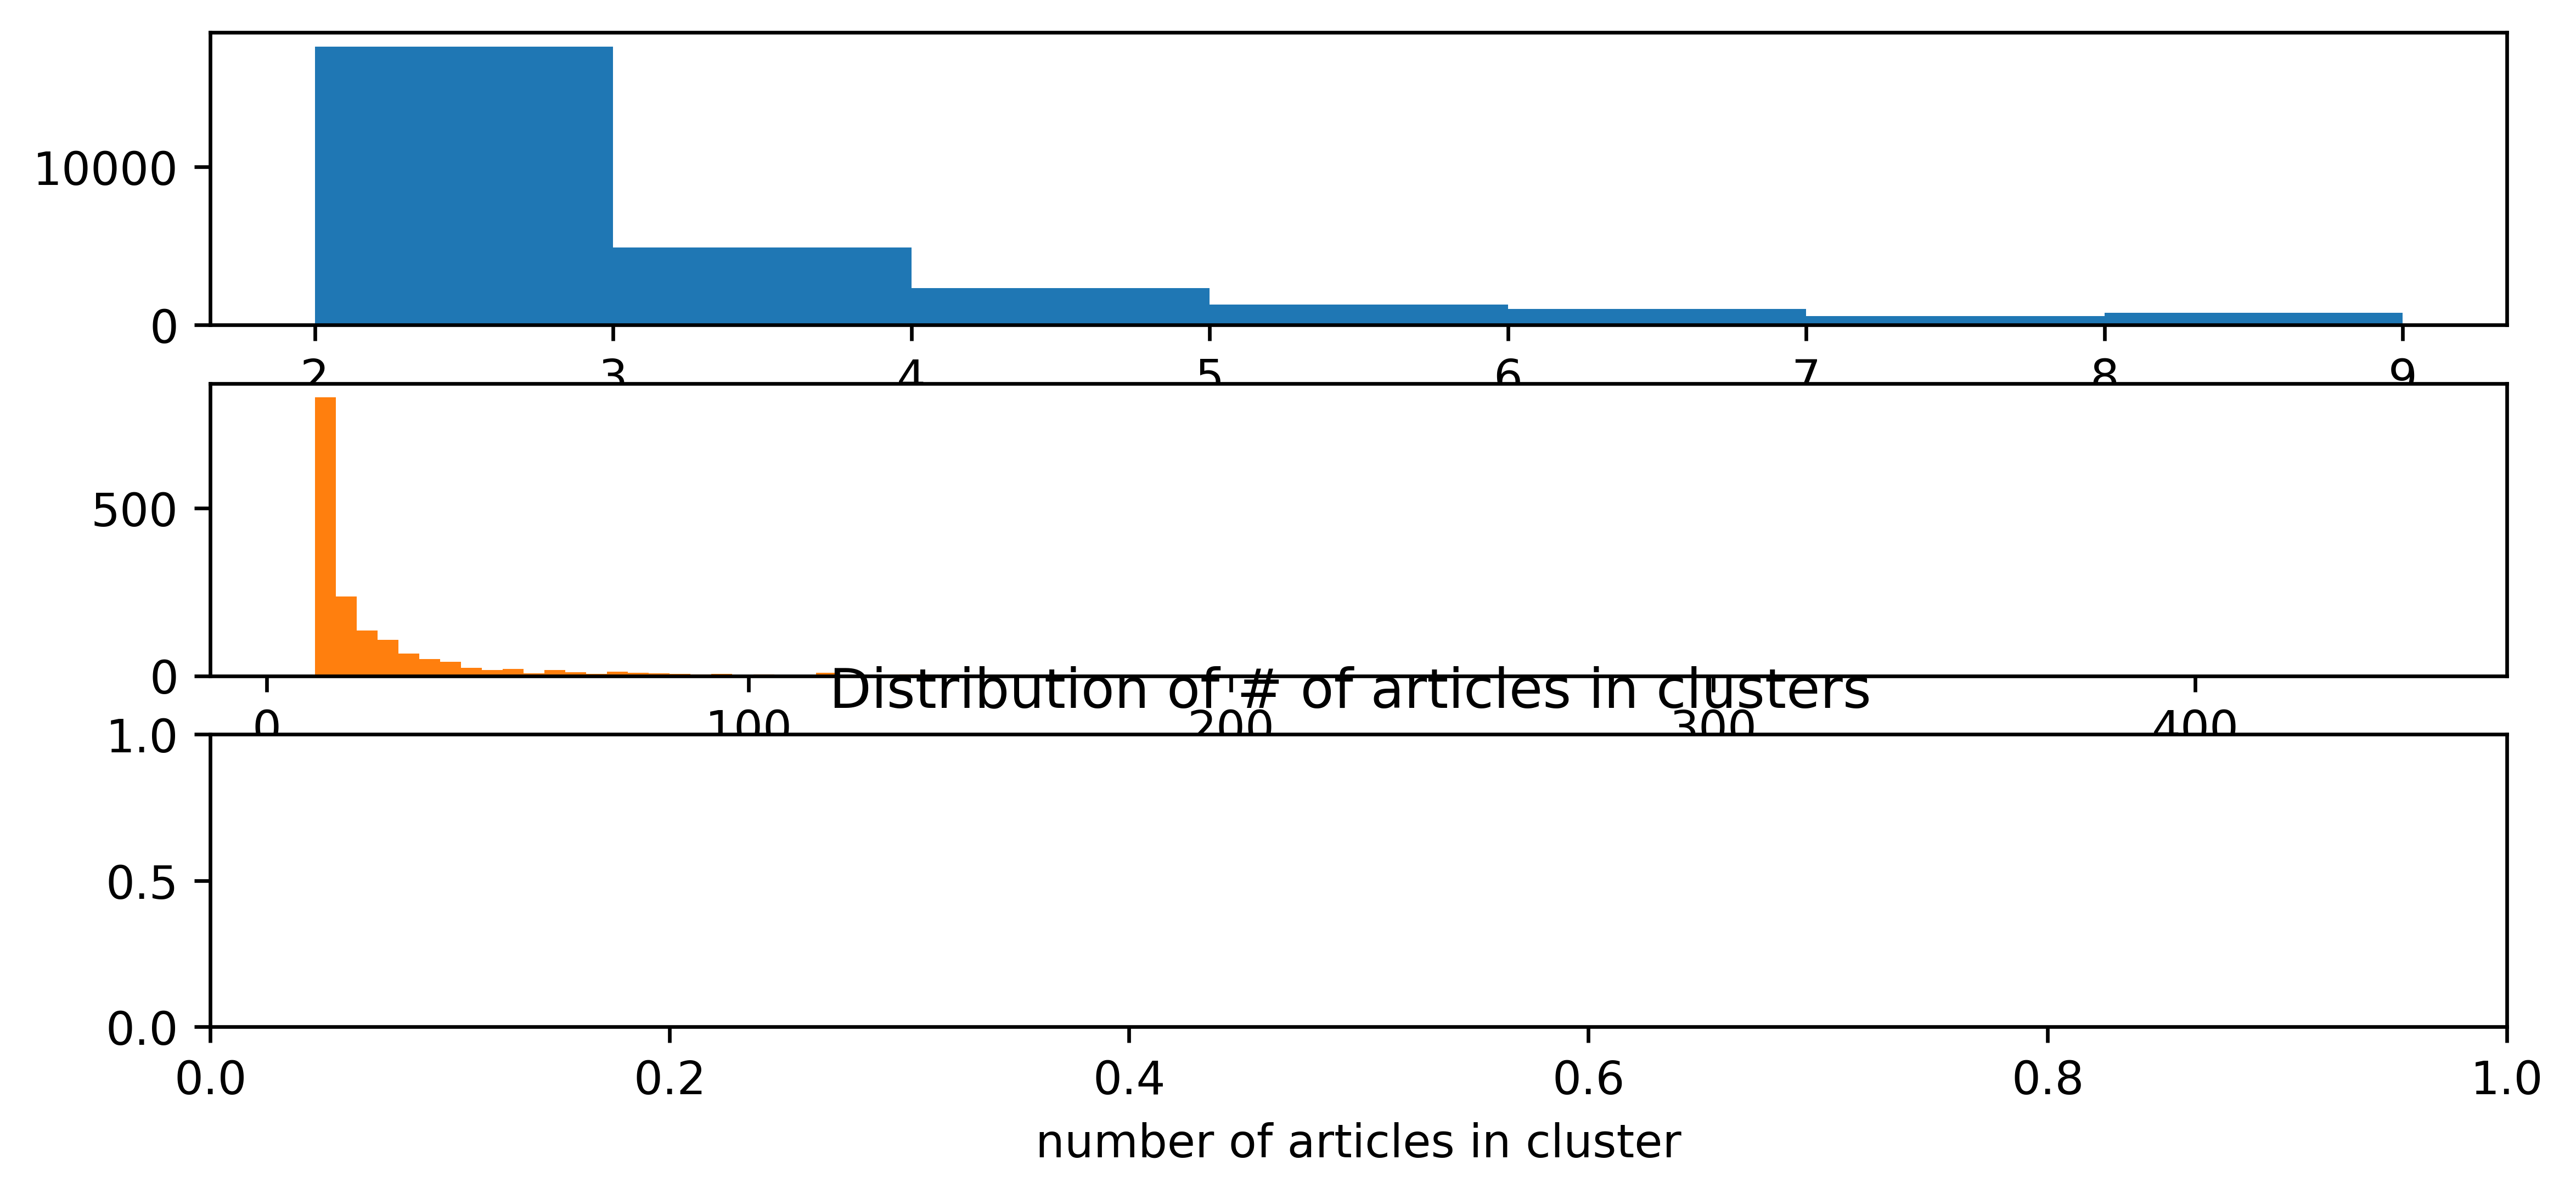

In [103]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=[9, 4])
axs[0].hist([len(item) for item in compList if len(item) > 1 and len(item) < 10], bins=7)
axs[1].hist([len(item) for item in compList if len(item) >=10 and len(item) < 500], bins=100)
axs[1].hist([len(item) for item in compList if len(item) >=10 and len(item) < 500], bins=100)
axs[2].set_xlabel("number of articles in cluster")
plt.title("Distribution of # of articles in clusters ")

In [7]:
#NOTE TODO: think about filtering out url's that have "video" in them
#Maybe use regex? 
#example: https://www.cnn.com/videos/business/2021/05/27/gop-senator-pat-toomey-woke-culture-banking-take-this-dlt-vpx.cnn

In [8]:
#manual verification 
filtered = [item for item in compList if len(item) <= 30 and len(item) >= 5]
print(len(filtered))
filtered[4800:4811]

5005


[{'moab’stimesindependent_A_peach_of_a_deal',
  'moab’stimesindependent_Bobbie_Wilcox_Hoyt_marks_90th_birthday',
  'moab’stimesindependent_Community_Rebuilds_seeks_VISTA_fundraising_coordinator',
  'moab’stimesindependent_Demolition_Men',
  'moab’stimesindependent_HMK_Students_of_the_Month_for_May',
  'moab’stimesindependent_HMK’s_students_of_the_month_for_April',
  'moab’stimesindependent_Hard_Landing',
  'moab’stimesindependent_Home_sweat-equity_home',
  'moab’stimesindependent_Jayne_Belnap_admitted_to_National_Academy_of_Sciences',
  'moab’stimesindependent_Jubilee_at_YGP',
  'moab’stimesindependent_Local_knowledge',
  'moab’stimesindependent_Locals_named_to_University_of_Utah_Spring_2021_Dean’s_List',
  'moab’stimesindependent_Memorial_Day_in_Moab',
  'moab’stimesindependent_Michael_Thompson_achieves_rank_of_Eagle_Scout',
  'moab’stimesindependent_Moab_had_a_blast_on_the_Fourth_of_July',
  'moab’stimesindependent_Most_Highway_191_work_ends_Friday',
  'moab’stimesindependent_Music_a

In [9]:
#TODO: check out some clusters that seem like they shouldn't be linked 
#something abou the fact that they are the same outlet? 
#probably some text that shows up for all of them. Verify this. 

#thedavisenterprise_Fregoso_named_preseason_All-Big_West
#thedavisenterprise_EPA_awards_UCD_$1.35M_to_study_household_dust
#thedavisenterprise_Fregoso_named_preseason_All-Big_West
#thedavisenterprise_Three_UC_Davis_football_players_earn_preseason_honors

#'therobesonian_Musicians_with_Robeson_County_ties_up_for_three_Josie_Music_Awards'
#'therobesonian_Purnell_Swett_graduate_competing_for_Miss_North_Carolina_crown'
#'therobesonian_Wildlife_Commission_advises_public_not_to_try_to_‘save’_fawns_they_think_are_abandoned'

#moab’stimesindependent_Home_sweat-equity_home
#moab’stimesindependent_HMK_Students_of_the_Month_for_May

In [10]:
#check larger clusters 
filtered = [item for item in compList if len(item) >=50 and len(item) <= 70]
print(len(filtered))
filtered[55]

64


{"abcnews_'He'd_like_to_murder_me,'_estranged_Durst_brother_testifies",
 "abcnews_Defense_says_Durst_had_no_motive,_didn't_kill_close_friend",
 "abcnews_Defense_says_dismemberment_is_evidence_of_Durst's_innocence",
 "abcnews_Defense_to_remind_jurors_Durst_says_he_didn't_kill_friend",
 'abcnews_Despite_health_woes,_Robert_Durst_murder_trial_continues',
 "abcnews_Durst's_defense_says_dismemberment_helps_prove_innocence",
 'abcnews_Durst_jurors_to_get_refresher_in_deaths_tied_to_millionaire',
 'abcnews_Durst_trial_to_resume_after_long_delay;_will_jury_be_ready?',
 "abcnews_Estranged_Durst_brother_testifies:_'He'd_like_to_murder_me'",
 "abcnews_Judge_to_Durst_jurors_after_delay:_'Where_did_we_leave_off?'",
 'abcnews_Juror_removed_from_Durst_murder_trial_as_pandemic_delay_ends',
 "abcnews_Prosecutor_says_Durst's_own_words_show_his_guilt_in_killings",
 'abcnews_Real_estate_heir_Durst_expected_to_testify_at_murder_trial',
 'abcnews_Robert_Durst_hospitalized,_delaying_his_murder_trial_again',


In [11]:
#check very large clusters 
filtered = [item for item in compList if len(item) >= 200 and len(item) <= 250]
print(len(filtered))
filtered[5]

6


{'thedailyreporter_$1M_grant_to_go_road_project_near_Fincantieri_Marine_in_Marinette',
 'thedailyreporter_ABC_economist:_Relief_in_sight_for_high_materials_prices',
 'thedailyreporter_AGC:_Data_show_big_rise_in_materials_prices,_pressuring_builders’_bottom_lines',
 'thedailyreporter_AGC:_Data_shows_drastic_rise_in_materials_prices,_pressuring_builders’_bottom-line',
 'thedailyreporter_AGC_Wis._survey:_Price_increases,_supply-chain_problems_cause_project_delays,_cancellations',
 'thedailyreporter_AGC_encourages_owners_to_build_greener_in_response_to_climate_change',
 'thedailyreporter_American_Family_Insurance_Amphitheater_renovation_–_Larson_Engineering',
 'thedailyreporter_Appeals_court_finds_Findorff_didn’t_retaliate_against_operator_who_alleged_sex_discrimination',
 'thedailyreporter_Aquila_selling_interests_in_copper_and_gold_deposits',
 'thedailyreporter_BUILDING_BLOCKS:_42_Hundred_on_the_Lake',
 'thedailyreporter_BUILDING_BLOCKS:_Advanced_Animal_Hospital',
 'thedailyreporter_BUIL

In [12]:
#put clustered data into long form 
clusters = pd.DataFrame({"cluster":compList}).reset_index()
clustDf = clusters.explode("cluster").rename(columns={"index":"clustNum", "cluster":"key"})
clustDf.head(3)

,clustNum,key
0,0,hillsborofreepress_Infinity_Fitness_has_offici...
0,0,hillsborofreepress_Cooking_for_a_good_cause
0,0,hillsborofreepress_County_fair_draws_nice_crowd


In [13]:
ogDf = pd.read_csv("/shared/3/projects/benlitterer/localNews/NetworkMVP/dataWithEmbeddings.tsv", sep="\t")

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (2,3,7,10,11,12,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
#merge clusters into the original data using the key column 
merged = pd.merge(ogDf, clustDf, how="right", on="key")

In [16]:
#here is an example where the data content was poorly cleaned 
print(list(merged.loc[merged["key"] == "moab’stimesindependent_Home_sweat-equity_home", "content"]))
print("####################### NEW ARTICLE ################################")

#this article is about basketball coaching and fatherhood...
print(list(merged.loc[merged["key"] == 'therobesonian_Purnell_Swett_graduate_competing_for_Miss_North_Carolina_crown', "content"])[0][:1000])
print(merged.loc[merged["key"] == 'therobesonian_Purnell_Swett_graduate_competing_for_Miss_North_Carolina_crown', "url_x"])
print("####################### NEW ARTICLE ################################")

print(list(merged.loc[merged["key"] == 'therobesonian_Musicians_with_Robeson_County_ties_up_for_three_Josie_Music_Awards', "content"])[0][:1000])
print(merged.loc[merged["key"] == 'therobesonian_Musicians_with_Robeson_County_ties_up_for_three_Josie_Music_Awards', "url_x"])

#what about very large cluster of 200+ articles from the the daily reporter? 
print(merged.loc[merged["key"] == 'thedailyreporter_ABC_economist:_Relief_in_sight_for_high_materials_prices', 'content'])
print(merged.loc[merged["key"] == 'thedailyreporter_BUILDING_BLOCKS:_Kestrel_apartment_project', 'content'])

#get number of daily reporter articles 
print(merged[merged["source"] == "thedailyreporter"].shape)

['Thank you for reading The Times-Independent!\n\nA paid subscription is required to access this content.\n\nPlease log in or Subscribe Today to continue reading.']
####################### NEW ARTICLE ################################
Bringing happiness to their children is the best ‘gift’ a dad can receive

I am horrible at basketball. That’s not a confession, you probably knew that about me already. However, I have become a decent but unlikely coach — to my 8-year-old that is.

It’s Father’s Day weekend, and I have a birthday in just a few days, a significant one. So, naturally this is a time for me to reflect on years past and what life looks like moving forward. I mentioned earlier that I’ve become a bit of a basketball coach, although admittedly I’m a bad player. Here’s where I’m going with that.

In the late days of spring, my youngest daughter got really interested in shooting basketball and she asked me to play with her. She is 8 and I love that age because she doesn’t know yet 

# Post-hoc cleaning: 
- articles with the same exact content but different titles (hit paywall etc.. )
- need to do beforehand in the future, but need results for now 
- what to do when there is an extra sentance or two of the article before the boilerplate paywall text..? 

In [17]:
print(merged.shape)

#we don't want reprints, and in some cases the title is different but the content 
#is the same (it's just paywall text or something), so we remove that. 
merged = merged.drop_duplicates(subset=["source", "content"])

#note: there were about 11,000 articles where this doubling occured. Needs to be cleaned in the original dataset 
print(merged.shape)

(274135, 49)
(263428, 49)


In [18]:
#check if that helped with the cluster having the exact same content 
merged.loc[merged["key"] == 'therobesonian_Purnell_Swett_graduate_competing_for_Miss_North_Carolina_crown']

#clustNum is 116562
#size went way down from up above 
merged[merged["clustNum"] == 116562]

,Unnamed: 0,Unnamed: 0.1,article_id,sourcedomain_id,date,title,content,url_x,fips,source,...,id,author,url,published,published_utc,collection_utc,key,topics,embedding,clustNum
245903,831314.0,831314.0,therobesonian--2021-06-19--Purnell Swett gradu...,therobesonian-robesonian.com,2021-06-19,Purnell Swett graduate competing for Miss Nort...,Bringing happiness to their children is the be...,https://www.robesonian.com/features/147118/pur...,37155.0,therobesonian,...,NaN,NaN,NaN,NaN,NaN,NaN,therobesonian_Purnell_Swett_graduate_competing...,"[('DATE', '8-year-old'), ('DATE', 'just a few ...",[-2.98850331e-03 -2.59165987e-02 -2.11383514e-...,116562
245906,831312.0,831312.0,therobesonian--2021-06-19--Bringing happiness ...,therobesonian-robesonian.com,2021-06-19,Bringing happiness to their children is the be...,I am horrible at basketball. That’s not a conf...,https://www.robesonian.com/features/147122/bri...,37155.0,therobesonian,...,NaN,NaN,NaN,NaN,NaN,NaN,therobesonian_Bringing_happiness_to_their_chil...,"[('DATE', '8-year-old'), ('DATE', 'just a few ...",[ 4.82416572e-03 -2.14030426e-02 -2.83718053e-...,116562


In [19]:
#check the moab cases 
#they were removed!
print(len(merged[merged["key"] == "moab’stimesindependent_Home_sweat-equity_home"]))
print(len(merged[merged["key"] =="moab’stimesindependent_HMK_Students_of_the_Month_for_May"]))

#any moab left? 
moabClust = merged[merged["source"] == "moab’stimesindependent"][["title", "content", "key", "clustNum"]].groupby(by="clustNum").agg(list)

#Jayne Belnap only has the one row and it is just the paywall thing 
list(merged[merged["key"].str.contains("Belnap")]["content"])[0]

0
1


'"I’m thrilled and excited and I really had no clue.”\n\nThank you for reading The Times-Independent!\n\nA paid subscription is required to access this content.\n\nPlease log in or Subscribe Today to continue reading.'

In [20]:
#get number of daily reporter articles 
#we can see that 599 - 386 were removed! 
print(merged[merged["source"] == "thedailyreporter"].shape)

(386, 49)


In [21]:
#now decide on cluster size cutoff 
grouped = merged[["key", "source", "title", "content", "clustNum"]].groupby(by="clustNum").agg(list)
grouped["clustLen"] = grouped["key"].apply(len)

In [22]:
max(grouped[grouped["clustLen"] < 800]["clustLen"])

546

In [23]:
#cluster with len 1524 is about the olympics 
#cluster with len 5806 is all baseball, what to do with that? 
#cluster with len 546 is eviction moratorium. Seems pretty good actually! 
#so go with cutoff of 600? although clusters above "make sense" they are just about broad things like baseball 
list(grouped[grouped["clustLen"] == 546]["key"])

[['therepublic_Biden_to_announce_new_eviction_ban_due_to_COVID_spread',
  'bostonherald_Anxious_tenants_await_assistance_as_evictions_resume',
  "yahoonews_Federal_judge_overturns_CDC's_eviction_moratorium",
  'businessinsider_Renters_have_only_received_11%_of_stimulus_aid_—_and_the_latest_eviction_ban_could_end_before_they_get_the_rest',
  'yahoonews_White_House_asks_states_to_aid_renters_as_CDC_can’t_extend_eviction_moratorium',
  'thedenverpost_CDC_issues_new_eviction_ban_for_most_of_US_through_Oct._3',
  'bostonherald_Tenants_prepare_for_unknown_as_eviction_moratorium_ends',
  'saintpaulpioneerpress_MN_Senate_passes_housing_bill_to_end_eviction_moratorium',
  'thecolumbian_Inslee_extends_Washington_eviction_moratorium_to_Sept._30',
  'citybusiness_Only_one-third_of_Louisiana’s_eviction_moratorium_relief_money_has_been_disbursed',
  'longislandbusinessnews_CDC_issues_new_eviction_ban_for_most_of_U.S._through_Oct._3',
  'vox_Biden_thinks_his_new_eviction_moratorium_may_be_doomed._Her

# Analysis 

In [24]:
#look at which outlet first started a story 

#first make sure we have the date of an outlet correctly specified 
merged["date"] = pd.to_datetime(merged["date"])

#group data together 
grouped = merged[["key", "source", "title", "content", "clustNum", "date", "national"]].groupby(by="clustNum").agg(list)
grouped["clustLen"] = grouped["key"].apply(len)

#get first to publish within a cluster 
grouped["first"] = grouped["date"].apply(lambda x: x.index(min(x)))

#get the national or local status for the first article in a cluster 
justFirst = pd.DataFrame({"clustSize":grouped["clustLen"]})
justFirst["national"] = grouped.apply(lambda x: x["national"][x["first"]], axis=1)


In [25]:
firstGrouped = justFirst.groupby(by=["clustSize"]).agg(list).reset_index()
firstGrouped["natProp"] = firstGrouped["national"].apply(lambda x: sum(x)/len(x))
#firstGrouped = firstGrouped[firstGrouped["clustSize"] < 100]

Text(0.5, 0.98, 'Story Starters: National vs. Local')

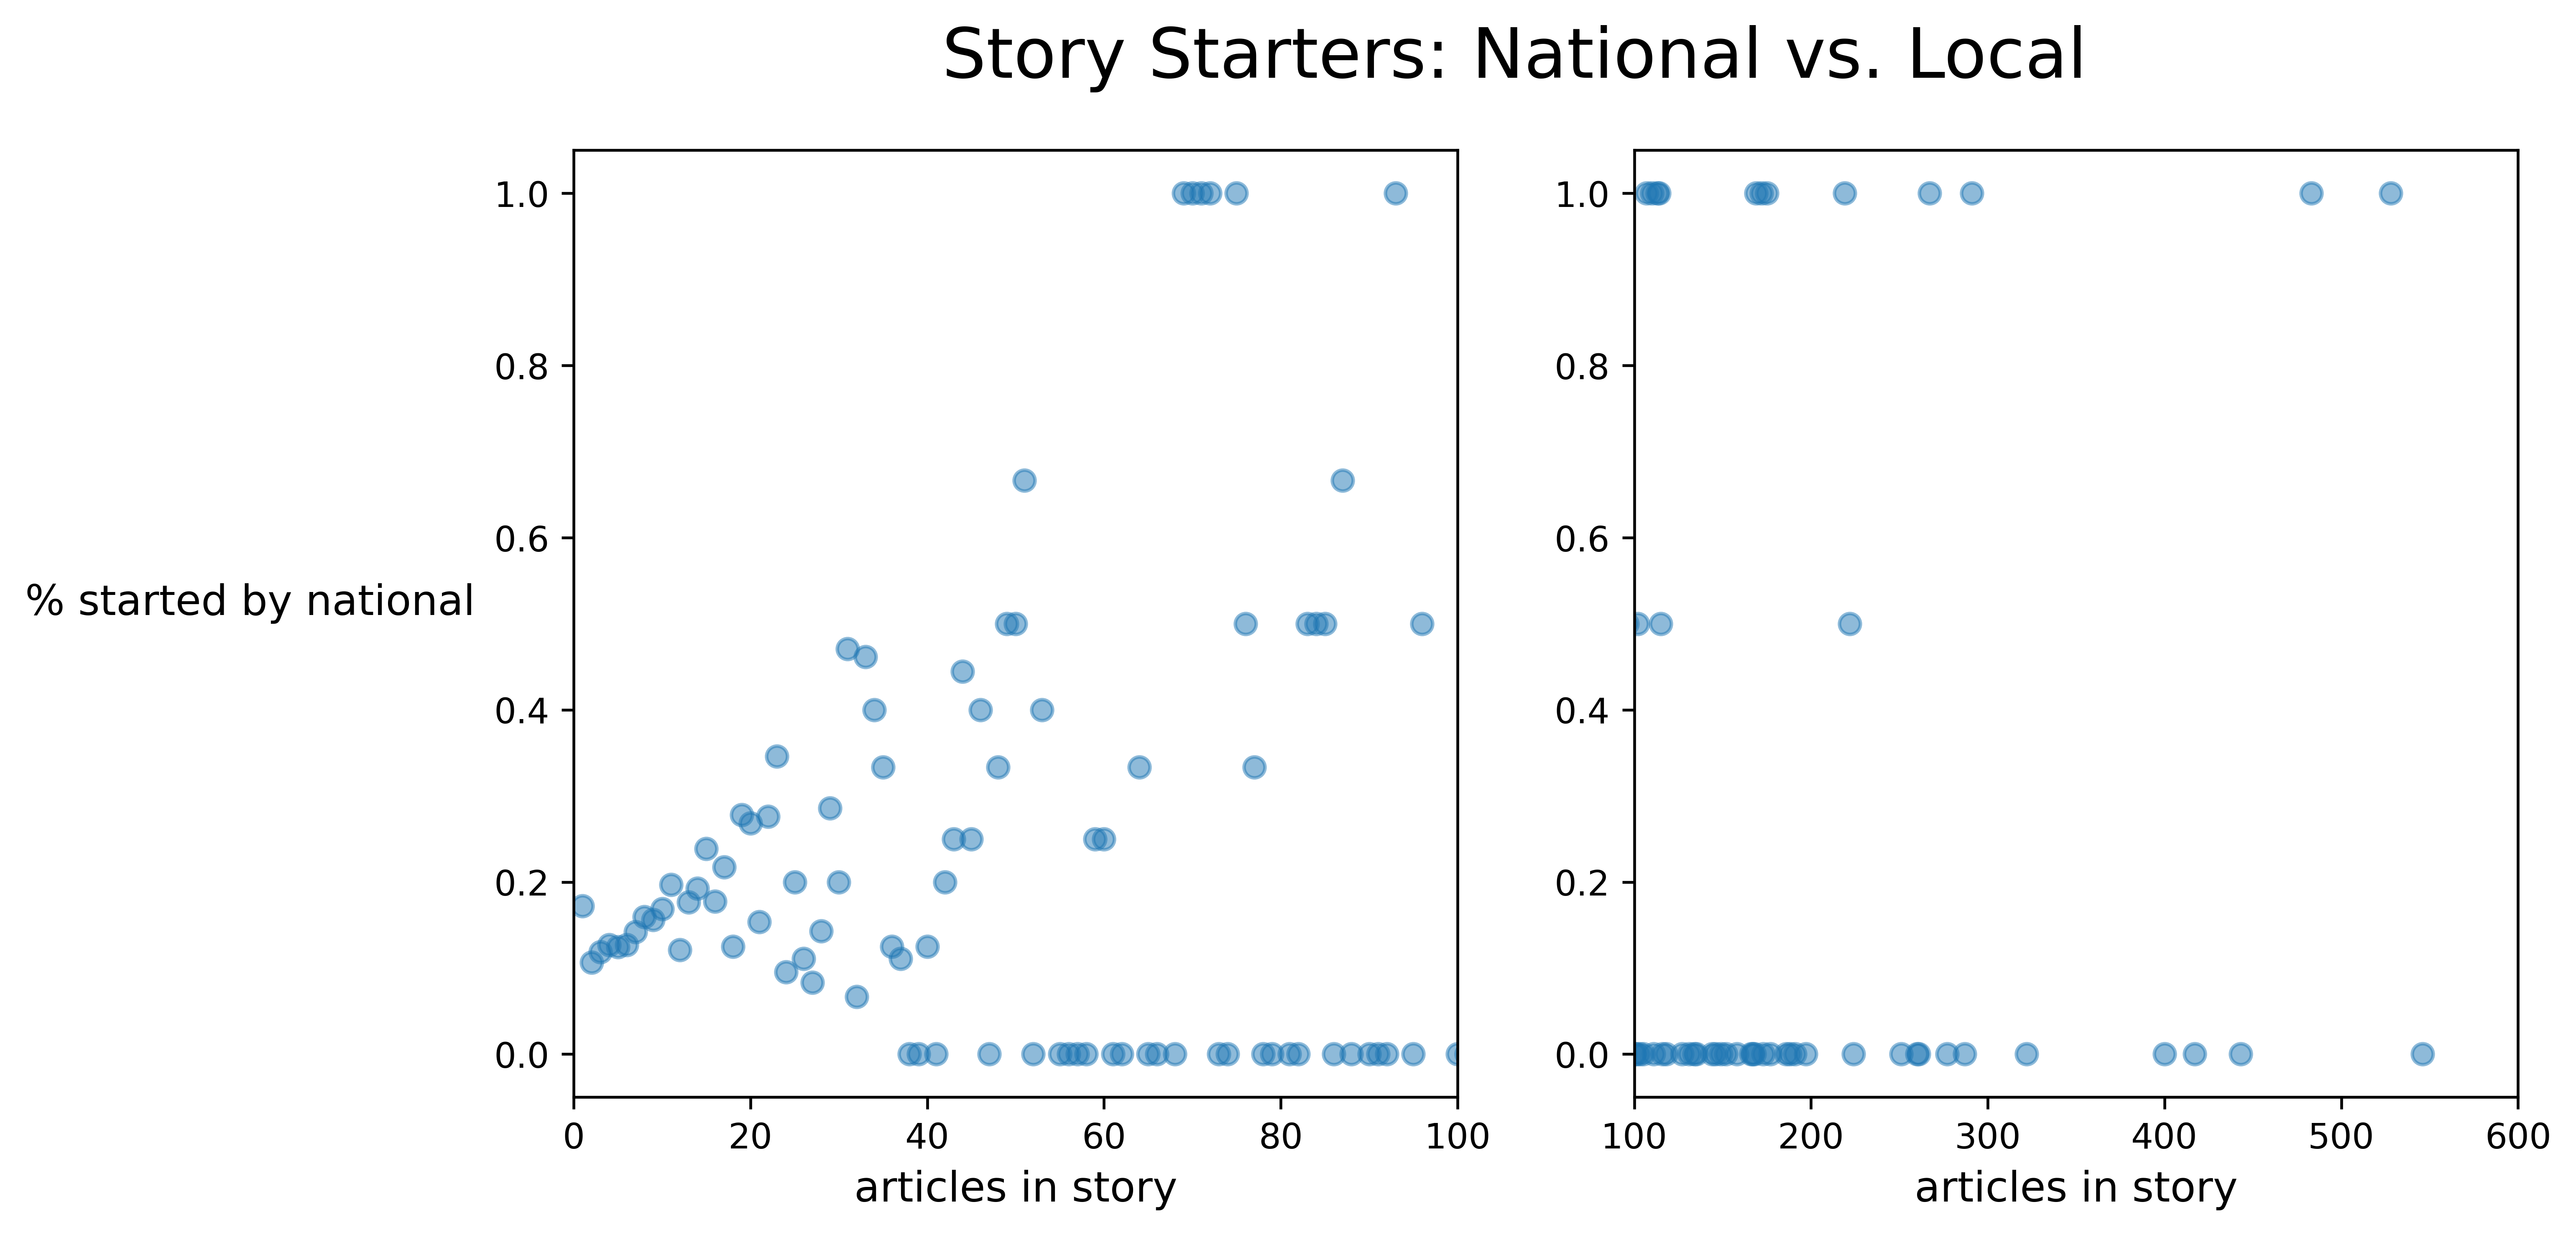

In [26]:
plt.rcParams['figure.dpi'] = 600
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].scatter(firstGrouped["clustSize"], firstGrouped["natProp"], alpha=.5)
axs[0].set_xlabel("articles in story", size=12)
axs[0].set_ylabel("% started by national", rotation=0, labelpad=70, size=12)
axs[0].set_xlim([0, 100])

axs[1].scatter(firstGrouped["clustSize"], firstGrouped["natProp"], alpha=.5)
axs[1].set_xlabel("articles in story", size=12)
#axs[1].set_ylabel("% started by national news", rotation=0, labelpad=70, size=12)
axs[1].set_xlim([100, 600])
fig.suptitle("Story Starters: National vs. Local", size=20)

### Same plot, but bin on the x axis for better understanding when x > 60 

bins
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]


Text(0.5, 0.98, 'Story Starters: National vs. Local')

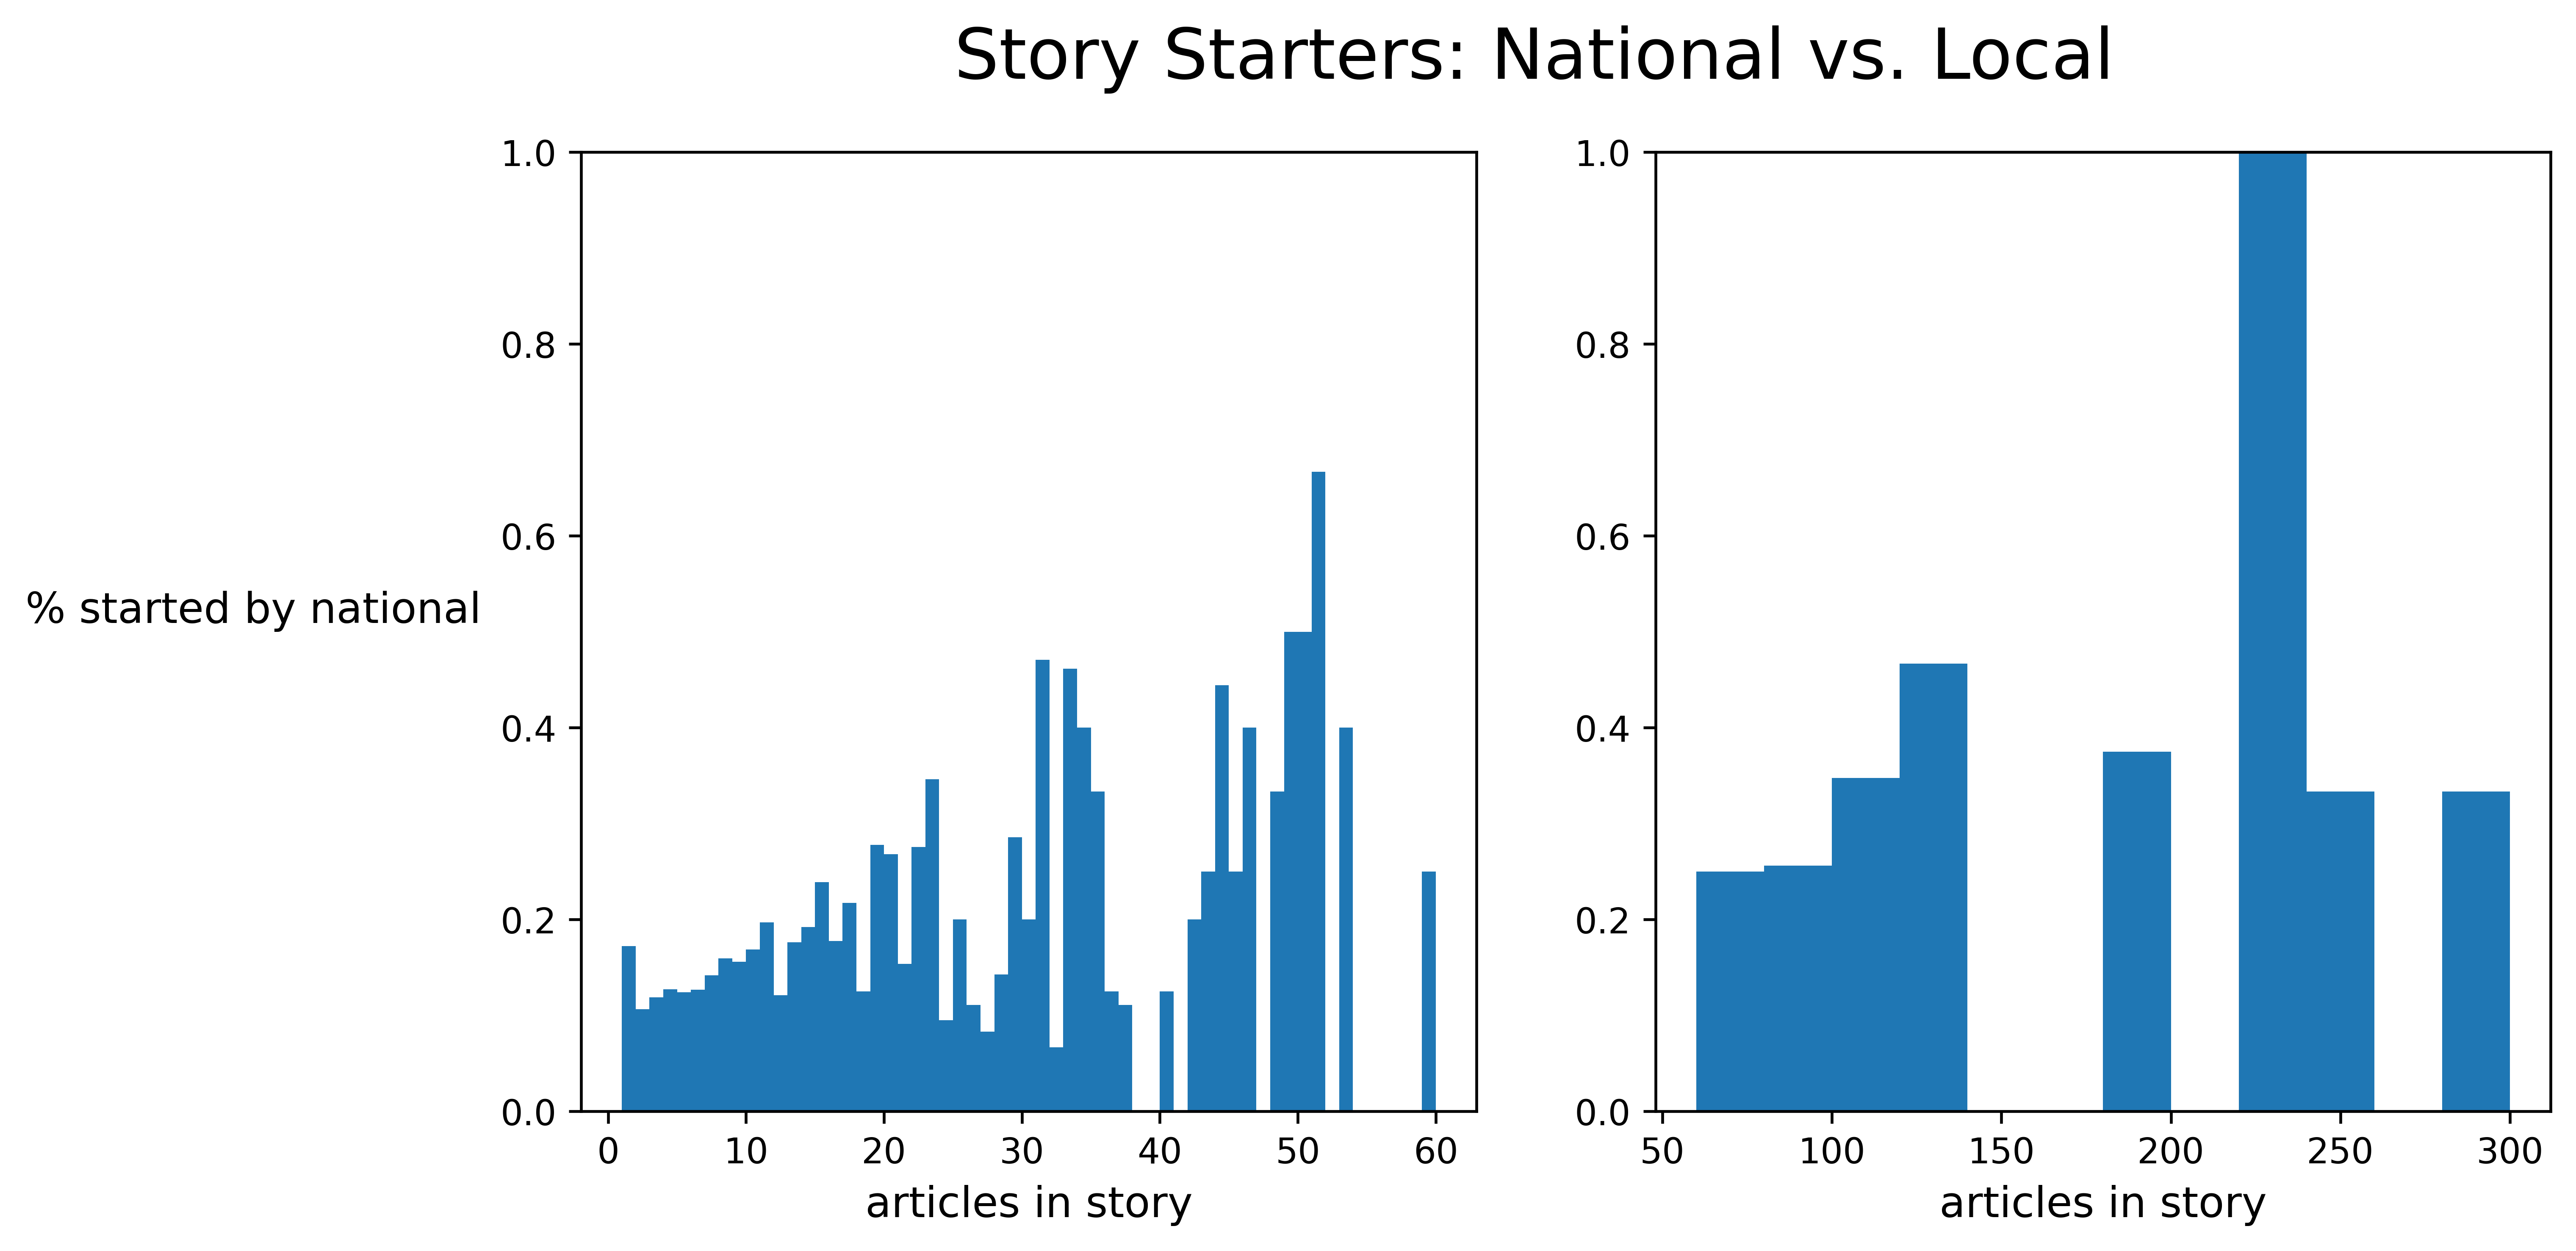

In [75]:
import numpy as np
bins = list(range(0, 61)) + list(np.arange(80, 300, 20))
justFirst["bin"] = pd.cut(justFirst["clustSize"], bins=bins)

#we now have grouping on the x axis. bins of size 1 for first 60, and size 20 for the rest 
groupedBins = justFirst.groupby(by="bin").agg(list).dropna()
groupedBins["nationalProp"] = groupedBins["national"].apply(lambda x: sum(x)/len(x))
groupedBins = groupedBins.reset_index()

groupedBins["right"] = groupedBins["bin"].apply(lambda x: x.right)
groupedBins["nationalProp"]

print("bins")
print(bins)

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

first60 = groupedBins[groupedBins["right"] < 60]
axs[0].bar(first60["right"], first60["nationalProp"], width=1, align="edge")
axs[0].set_xlabel("articles in story", size=12)
axs[0].set_ylabel("% started by national", rotation=0, labelpad=70, size=12)
axs[0].set_ylim([0, 1])

remaining = groupedBins[groupedBins["right"] >= 60]
axs[1].bar(remaining["right"], remaining["nationalProp"], width=20, align="edge")
axs[1].set_xlabel("articles in story", size=12)
axs[1].set_ylim([0, 1])

fig.suptitle("Story Starters: National vs. Local", size=20)

### Just look at story composition 

In [82]:
grouped["nationalPercent"] = grouped["national"].apply(lambda x: sum(x)/len(x))

#group again by size of the story (number of articles in story)
clustLenDf = grouped[["clustLen", "nationalPercent"]].groupby(by=["clustLen"]).agg(list).reset_index()

In [89]:
clustLenDf["nationalAverage"] = clustLenDf["nationalPercent"].apply(np.mean)

Text(0.5, 0.98, 'Story Makeup: National vs. Local Coverage')

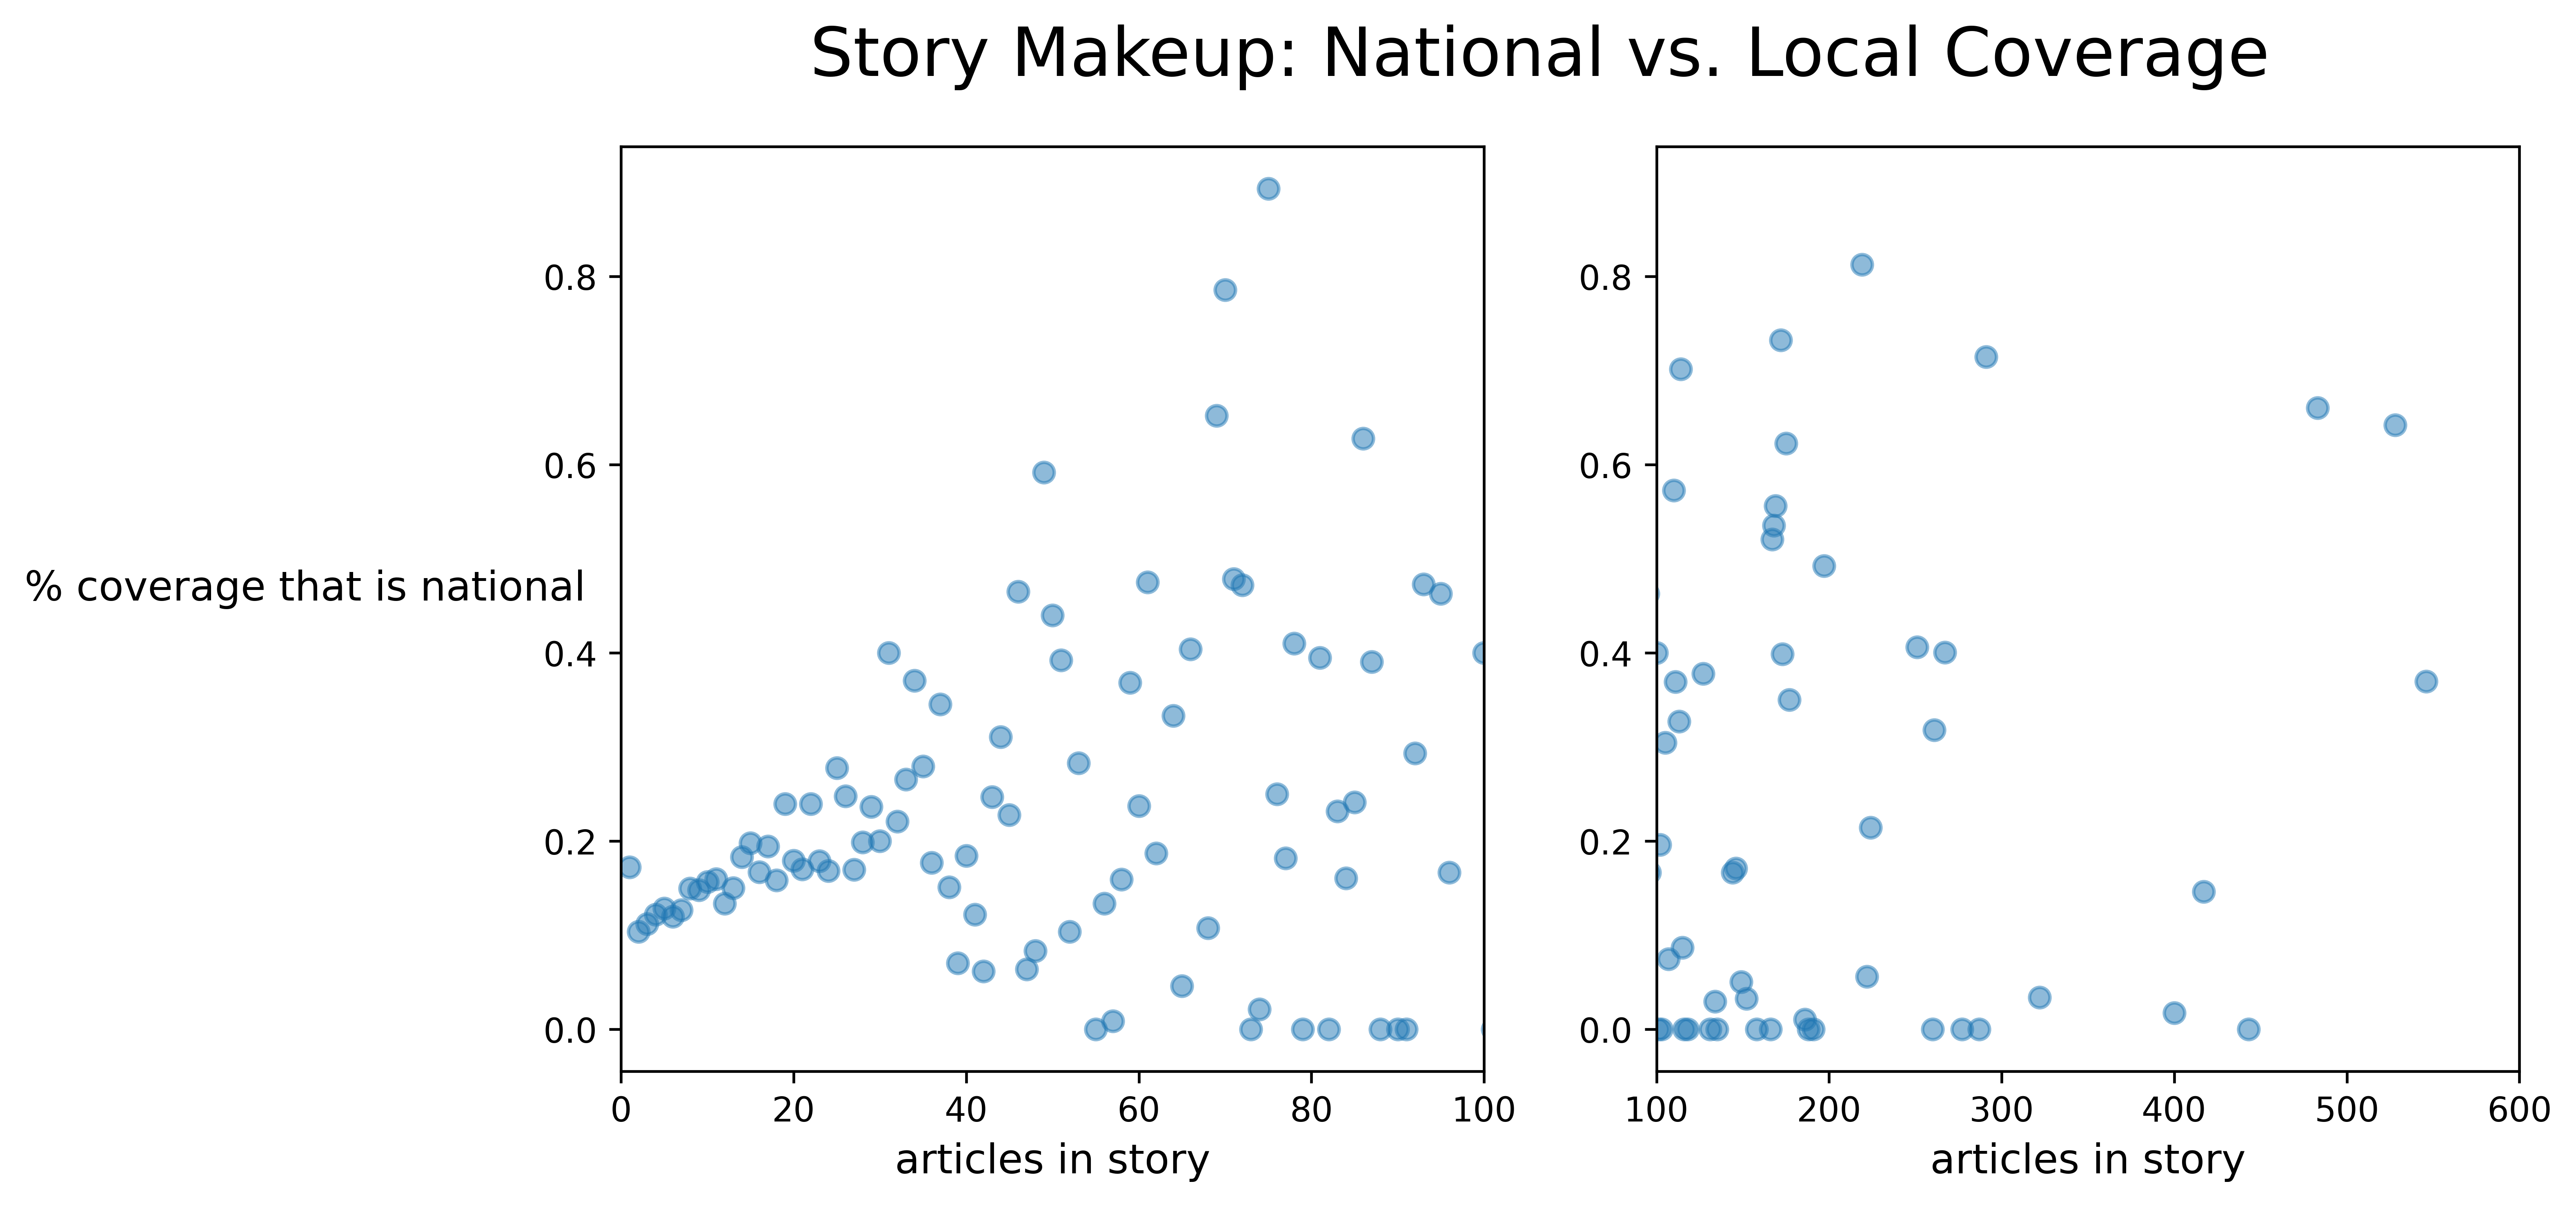

In [105]:
#plt.scatter(clustLenDf["clustLen"], clustLenDf["nationalAverage"], alpha=.5)
#plt.xlim([0, 100])

plt.rcParams['figure.dpi'] = 600
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].scatter(clustLenDf["clustLen"], clustLenDf["nationalAverage"], alpha=.5)
axs[0].set_xlabel("articles in story", size=12)
axs[0].set_ylabel("% coverage that is national", rotation=0, labelpad=70, size=12)
axs[0].set_xlim([0, 100])

axs[1].scatter(clustLenDf["clustLen"], clustLenDf["nationalAverage"], alpha=.5)
axs[1].set_xlabel("articles in story", size=12)
#axs[1].set_ylabel("% started by national news", rotation=0, labelpad=70, size=12)
axs[1].set_xlim([100, 600])
fig.suptitle("Story Makeup: National vs. Local Coverage", size=20)

In [ ]:
import numpy as np
bins = list(range(0, 61)) + list(np.arange(80, 300, 20))
justFirst["bin"] = pd.cut(justFirst["clustSize"], bins=bins)

#we now have grouping on the x axis. bins of size 1 for first 60, and size 20 for the rest 
groupedBins = justFirst.groupby(by="bin").agg(list).dropna()
groupedBins["nationalProp"] = groupedBins["national"].apply(lambda x: sum(x)/len(x))
groupedBins = groupedBins.reset_index()

groupedBins["right"] = groupedBins["bin"].apply(lambda x: x.right)
groupedBins["nationalProp"]

print("bins")
print(bins)

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

first60 = groupedBins[groupedBins["right"] < 60]
axs[0].bar(first60["right"], first60["nationalProp"], width=1, align="edge")
axs[0].set_xlabel("articles in story", size=12)
axs[0].set_ylabel("% started by national", rotation=0, labelpad=70, size=12)
axs[0].set_ylim([0, 1])

remaining = groupedBins[groupedBins["right"] >= 60]
axs[1].bar(remaining["right"], remaining["nationalProp"], width=20, align="edge")
axs[1].set_xlabel("articles in story", size=12)
axs[1].set_ylim([0, 1])

fig.suptitle("Story Starters: National vs. Local", size=20)